### libray inclusion

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,roc_curve,recall_score,roc_auc_score,auc,confusion_matrix,cohen_kappa_score, f1_score, precision_score,matthews_corrcoef 
from tqdm import tqdm
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectPercentile, f_classif, chi2, SelectFromModel, SelectKBest
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Optional imports for preprocessing and visualization
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [177]:
# Set the display options to show all columns
pd.set_option('display.max_columns', None)

Radiomics Feature Analysis

In [178]:
Final_accuracy={}

In [ ]:

import pandas as pd

# Load the main dataset
main_df = pd.read_csv("./Radiomics_Feature.csv")

# Load the test dataset
test_df = pd.read_csv("./RM_features_Test.csv")

# Identify rows in the main dataset that are also present in the test dataset
test_indices = main_df.merge(test_df, on=['Patient_id'], how='inner').index

# Remove the test data details from the main dataset
cleaned_main_df = main_df.drop(test_indices)

# Save the cleaned main dataset to a new CSV file
cleaned_main_df.to_csv("Radiomics_Feature_Train.csv", index=False)


In [179]:
df_rm_Train=pd.read_csv("Radiomics_Feature_Train.csv")

In [180]:
print(df_rm_Train.shape)


(1378, 1221)


In [181]:
main_df = pd.read_csv("./Radiomics_Feature.csv")
main_df['Malignancy'].value_counts()

0    1047
1     346
Name: Malignancy, dtype: int64

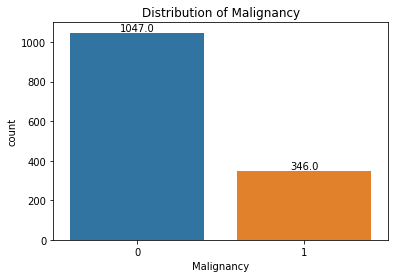

In [182]:
# If you want to order the bars by count, you can use the order parameter
order = df_rm['Malignancy'].value_counts().index
ax = sns.countplot(x='Malignancy', data=main_df, order=order)

plt.title('Distribution of Malignancy')

# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [183]:
import tensorflow as tf
import os
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Load the model
model = load_model('feature_extractor_model_27-05-2024_128.h5')

# Load or prepare your test data (replace this with your actual test data)
# X_test = ... 
# y_test = ...
train_data_path = r'../../DataSet Files/ROI_ny_files'
train_patients = [name for name in os.listdir(train_data_path) if os.path.isfile(os.path.join(train_data_path, name))]
file_list = sorted(train_patients)
print(file_list)

# For a classification model, you might need to convert predictions to class labels



['LIDC-IDRI-0001_1_roi.npy', 'LIDC-IDRI-0002_1_roi.npy', 'LIDC-IDRI-0003_1_roi.npy', 'LIDC-IDRI-0003_2_roi.npy', 'LIDC-IDRI-0003_3_roi.npy', 'LIDC-IDRI-0004_1_roi.npy', 'LIDC-IDRI-0005_1_roi.npy', 'LIDC-IDRI-0005_2_roi.npy', 'LIDC-IDRI-0006_1_roi.npy', 'LIDC-IDRI-0006_2_roi.npy', 'LIDC-IDRI-0007_1_roi.npy', 'LIDC-IDRI-0008_1_roi.npy', 'LIDC-IDRI-0008_2_roi.npy', 'LIDC-IDRI-0010_1_roi.npy', 'LIDC-IDRI-0010_2_roi.npy', 'LIDC-IDRI-0011_1_roi.npy', 'LIDC-IDRI-0011_2_roi.npy', 'LIDC-IDRI-0011_3_roi.npy', 'LIDC-IDRI-0011_4_roi.npy', 'LIDC-IDRI-0011_5_roi.npy', 'LIDC-IDRI-0011_6_roi.npy', 'LIDC-IDRI-0011_7_roi.npy', 'LIDC-IDRI-0012_10_roi.npy', 'LIDC-IDRI-0012_1_roi.npy', 'LIDC-IDRI-0012_2_roi.npy', 'LIDC-IDRI-0012_3_roi.npy', 'LIDC-IDRI-0012_4_roi.npy', 'LIDC-IDRI-0012_5_roi.npy', 'LIDC-IDRI-0012_6_roi.npy', 'LIDC-IDRI-0012_7_roi.npy', 'LIDC-IDRI-0012_8_roi.npy', 'LIDC-IDRI-0012_9_roi.npy', 'LIDC-IDRI-0013_1_roi.npy', 'LIDC-IDRI-0013_2_roi.npy', 'LIDC-IDRI-0013_3_roi.npy', 'LIDC-IDRI-0014_1_

In [184]:
print(len(file_list))
ls=[]
ls=set(file_list)-set(df_rm_Train['Patient_id'])
print(len(set(file_list)-set(df_rm_Train['Patient_id'])))

1393
15


In [185]:
filtered_list = [item for item in file_list if item not in ls]
filtered_list

['LIDC-IDRI-0011_1_roi.npy',
 'LIDC-IDRI-0011_2_roi.npy',
 'LIDC-IDRI-0011_3_roi.npy',
 'LIDC-IDRI-0011_4_roi.npy',
 'LIDC-IDRI-0011_5_roi.npy',
 'LIDC-IDRI-0011_6_roi.npy',
 'LIDC-IDRI-0011_7_roi.npy',
 'LIDC-IDRI-0012_10_roi.npy',
 'LIDC-IDRI-0012_1_roi.npy',
 'LIDC-IDRI-0012_2_roi.npy',
 'LIDC-IDRI-0012_3_roi.npy',
 'LIDC-IDRI-0012_4_roi.npy',
 'LIDC-IDRI-0012_5_roi.npy',
 'LIDC-IDRI-0012_6_roi.npy',
 'LIDC-IDRI-0012_7_roi.npy',
 'LIDC-IDRI-0012_8_roi.npy',
 'LIDC-IDRI-0012_9_roi.npy',
 'LIDC-IDRI-0013_1_roi.npy',
 'LIDC-IDRI-0013_2_roi.npy',
 'LIDC-IDRI-0013_3_roi.npy',
 'LIDC-IDRI-0014_1_roi.npy',
 'LIDC-IDRI-0016_1_roi.npy',
 'LIDC-IDRI-0016_2_roi.npy',
 'LIDC-IDRI-0016_3_roi.npy',
 'LIDC-IDRI-0016_4_roi.npy',
 'LIDC-IDRI-0016_5_roi.npy',
 'LIDC-IDRI-0018_1_roi.npy',
 'LIDC-IDRI-0018_2_roi.npy',
 'LIDC-IDRI-0018_3_roi.npy',
 'LIDC-IDRI-0018_4_roi.npy',
 'LIDC-IDRI-0020_1_roi.npy',
 'LIDC-IDRI-0021_1_roi.npy',
 'LIDC-IDRI-0023_1_roi.npy',
 'LIDC-IDRI-0024_1_roi.npy',
 'LIDC-IDRI-0

In [186]:
data = [np.expand_dims(np.load(f'{train_data_path}/{file}'), axis=-1) for file in filtered_list]
X_train = np.array(data)
# Ensure X_test is a NumPy array
# X_test = np.array(X_test)

# Make predictions
predictions = model.predict(X_train)

predictions_df = pd.DataFrame(predictions)
predictions_df['Patient_id']=df_rm_Train['Patient_id']
# Save to CSV
predictions_df.to_csv('Deep_Learning_Features_Train.csv', index=False)

44/44 [==============================] - 324s 7s/step


Fuse Model Analysis with 1218 Features and 128 Features

In [187]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df_rm = pd.read_csv("./Radiomics_Feature_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features_Train.csv")
merged_data = pd.merge(df_rm, df_dl, on='Patient_id', how='inner')

print(merged_data.shape,df_rm.shape,df_dl.shape)
merged_data.head()
# Define features and target
X_Full = merged_data.drop(columns=['Patient_id', 'nodule no','Malignancy'])
y_Full = merged_data['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_Full, y_Full)

# Standardize the data
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_Full.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")

    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Train the model
    model = SVC(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    #y_test = np.array(y_test).reshape(-1)
    #y_pred = np.array(y_pred).reshape(-1)
    #print(y_pred.shape,y_pred)
    # Ensure y_test and y_pred are 1-dimensional
    #y_test = y_test.ravel()
   # y_pred = y_pred.ravel()
    
    #print(y_test.shape,y_test)
    #y_test = y_test.values[:, -1]
    #y_pred = y_pred[:, -1]
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")
# Save the best model
joblib.dump(best_model, 'best_SVM_model_1218_128_features.pkl')
Final_accuracy['RM 1218 DL 128 Features']=best_accuracy
# Standardize the full dataset for making final predictions
X_standardized = scaler.transform(X_Full)
y_pred_best = best_model.predict(X_standardized)
accuracy = accuracy_score(y_Full, y_pred_best)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_Full, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_Full, y_pred_best))
# Save predictions to a CSV file
df_predictions = pd.DataFrame({'True Label': y_Full, 'Predicted Label': y_pred_best})
df_predictions.to_csv('predictions_1218_128.csv', index=False)

# Calculate and print the average accuracy



(1378, 1349) (1378, 1221) (1378, 129)
Fold 1:
------------------------------
Accuracy: 0.8892
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       212
           1       0.88      0.90      0.89       203

    accuracy                           0.89       415
   macro avg       0.89      0.89      0.89       415
weighted avg       0.89      0.89      0.89       415

Confusion Matrix:
 [[187  25]
 [ 21 182]]
Fold 2:
------------------------------
Accuracy: 0.9253
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       191
           1       0.95      0.91      0.93       224

    accuracy                           0.93       415
   macro avg       0.92      0.93      0.93       415
weighted avg       0.93      0.93      0.93       415

Confusion Matrix:
 [[181  10]
 [ 21 203]]
Fold 3:
------------------------------
Accuracy: 0.9229
Classifi

c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.9470
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      1037
           1       0.86      0.94      0.90       341

    accuracy                           0.95      1378
   macro avg       0.92      0.94      0.93      1378
weighted avg       0.95      0.95      0.95      1378

Confusion Matrix:
 [[985  52]
 [ 21 320]]


Feature Selection 

[0.00094966 0.00105422 0.0006752  ... 0.0008921  0.00075147 0.00048357]


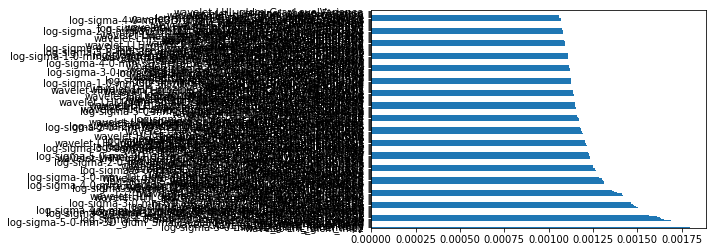

In [188]:
from sklearn.ensemble import ExtraTreesClassifier
Rm_df = pd.read_csv('./Radiomics_Feature.csv')
Rm_df.fillna(0, inplace=True)
# Separate features (X) and target variable (y)
df=Rm_df.drop(columns=['Patient_id','nodule no'])
X = df.drop('Malignancy', axis=1)
y = df['Malignancy']

# Split the dataset into training and testing sets


# Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
X_standardized = StandardScaler().fit_transform(X)

model = ExtraTreesClassifier()
model.fit(X_standardized,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances.nlargest(200).plot(kind='barh')
plt.show()

In [189]:
top_features_200 = feat_importances.nlargest(200)  # Get the top 200 features
RM_200_top_feature_names = top_features_200.index.tolist()  # Get the names of the top features as a list

top_features_100 = feat_importances.nlargest(100)  # Get the top 100 features
RM_100_top_feature_names = top_features_100.index.tolist()


[2.17668995e-02 0.00000000e+00 0.00000000e+00 1.78772060e-02
 0.00000000e+00 2.54228039e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.30051431e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.38171034e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.93072181e-02 0.00000000e+00
 1.43936516e-02 1.70591881e-02 0.00000000e+00 4.51023821e-02
 1.48333474e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.20623151e-02 0.00000000e+00
 0.00000000e+00 3.86708478e-02 0.00000000e+00 1.11817132e-02
 0.00000000e+00 0.00000000e+00 1.52229200e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.73520709e-02
 0.00000000e+00 3.40048243e-02 3.12119107e-03 0.00000000e+00
 0.00000000e+00 2.00575940e-02 0.00000000e+00 1.97967730e-02
 0.00000000e+00 0.000000

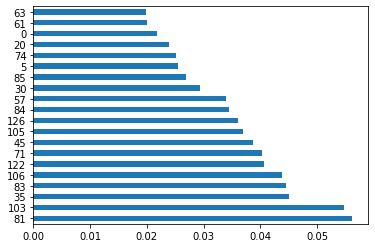

In [190]:
  # Get the names of the top features as a list
from sklearn.ensemble import ExtraTreesClassifier
df_dl=pd.read_csv('./Deep_Learning_Features_Full.csv')
df = pd.read_csv("./Radiomics_Feature.csv")
df_dl.fillna(0, inplace=True)
# Separate features (X) and target variable (y)


X=df_dl.drop(columns=['Patient_id'])

y = df['Malignancy']

# Split the dataset into training and testing sets


# Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
X_standardized = StandardScaler().fit_transform(X)

model = ExtraTreesClassifier()
model.fit(X_standardized,y)
print(model.feature_importances_)
feat_importances_DL = pd.Series(model.feature_importances_, index=X.columns)

feat_importances_DL.nlargest(20).plot(kind='barh')
plt.show()

In [191]:
top_20_features = feat_importances_DL.nlargest(20)  # Get the top 200 features
DL_20_top_feature_names = top_20_features.index.tolist()  # Get the names of the top features as a list
print(DL_20_top_feature_names)
X_20=df_dl[DL_20_top_feature_names]

top_10_features = feat_importances_DL.nlargest(10)  # Get the top 200 features
DL_10_top_feature_names = top_10_features.index.tolist()  # Get the names of the top features as a list
print(DL_10_top_feature_names)
X_10=df_dl[DL_10_top_feature_names]

['81', '103', '35', '83', '106', '122', '71', '45', '105', '126', '84', '57', '30', '85', '5', '74', '20', '0', '61', '63']
['81', '103', '35', '83', '106', '122', '71', '45', '105', '126']


Fuse Model Analysis with 1218 Radiomics Features and 20 Deep Learning Features

In [193]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Feature_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features_Train.csv")
# Define features and target
# Specify the feature names
X_rm=df.drop(['Patient_id','Malignancy','nodule no'], axis=1)
X_20=df_dl[DL_20_top_feature_names]
X_1238_DL_featues= pd.concat([X_rm, X_20], axis=1)

y_full = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_1238_DL_featues, y_full)

# Standardize the data
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_1238_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
   
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = SVC(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")
# Save the best model
joblib.dump(best_model, 'best_SVM_model_1218_20_features.pkl')
Final_accuracy['RM 1218 DL 20 Features']=best_accuracy
# Standardize the full dataset for making final predictions
X_standardized = scaler.transform(X_1238_DL_featues)
y_pred_best = best_model.predict(X_standardized)
accuracy = accuracy_score(y_full, y_pred_best)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_full, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_full, y_pred_best))
# Save predictions to a CSV file
df_predictions = pd.DataFrame({'True Label': y_full, 'Predicted Label': y_pred_best})
df_predictions.to_csv('predictions_1218_20.csv', index=False)

# Calculate and print the average accuracy

# Standardize the full dataset for making final predictions
#X_standardized = scaler.transform(X_200)



Fold 1:
------------------------------
Accuracy: 0.8651
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       212
           1       0.85      0.88      0.86       203

    accuracy                           0.87       415
   macro avg       0.87      0.87      0.87       415
weighted avg       0.87      0.87      0.87       415

Confusion Matrix:
 [[181  31]
 [ 25 178]]
Fold 2:
------------------------------
Accuracy: 0.9205
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       191
           1       0.93      0.92      0.93       224

    accuracy                           0.92       415
   macro avg       0.92      0.92      0.92       415
weighted avg       0.92      0.92      0.92       415

Confusion Matrix:
 [[175  16]
 [ 17 207]]
Fold 3:
------------------------------
Accuracy: 0.8940
Classification Report:
               precisio

c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.9253
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      1037
           1       0.81      0.92      0.86       341

    accuracy                           0.93      1378
   macro avg       0.89      0.92      0.90      1378
weighted avg       0.93      0.93      0.93      1378

Confusion Matrix:
 [[961  76]
 [ 27 314]]


Fuse Model Analysis with 1218 Radiomics Features and 10 Deep Learning Features

In [194]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Feature_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features_Train.csv")
# Define features and target
# Specify the feature names
X_rm=df.drop(['Patient_id','Malignancy','nodule no'], axis=1)
X_10=df_dl[DL_10_top_feature_names]
X_1228_DL_featues= pd.concat([X_rm, X_10], axis=1)

y_Full = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_1228_DL_featues, y_Full)

# Standardize the data
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_1228_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
   
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = SVC(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model
# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")
joblib.dump(best_model, 'best_SVM_model_1218_10_features.pkl')
Final_accuracy['RM 1218 and 10 DL Features']=best_accuracy
# Standardize the full dataset for making final predictions
#X_standardized = scaler.transform(X_200)


# Save predictions to a CSV file
X_standardized = scaler.transform(X_1228_DL_featues)
y_pred_best = best_model.predict(X_standardized)
accuracy = accuracy_score(y_Full, y_pred_best)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_Full, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_Full, y_pred_best))
# Save predictions to a CSV file
df_predictions = pd.DataFrame({'True Label': y_Full, 'Predicted Label': y_pred_best})
df_predictions.to_csv('predictions_1218_10.csv', index=False)


Fold 1:
------------------------------
Accuracy: 0.8506
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       212
           1       0.83      0.87      0.85       203

    accuracy                           0.85       415
   macro avg       0.85      0.85      0.85       415
weighted avg       0.85      0.85      0.85       415

Confusion Matrix:
 [[176  36]
 [ 26 177]]
Fold 2:
------------------------------
Accuracy: 0.8795
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       191
           1       0.90      0.88      0.89       224

    accuracy                           0.88       415
   macro avg       0.88      0.88      0.88       415
weighted avg       0.88      0.88      0.88       415

Confusion Matrix:
 [[169  22]
 [ 28 196]]
Fold 3:
------------------------------
Accuracy: 0.8771
Classification Report:
               precisio

c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.9165
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94      1037
           1       0.79      0.91      0.84       341

    accuracy                           0.92      1378
   macro avg       0.88      0.91      0.89      1378
weighted avg       0.92      0.92      0.92      1378

Confusion Matrix:
 [[954  83]
 [ 32 309]]


In [195]:
RM_200_top_feature_names

['wavelet-LHL_glcm_Imc2',
 'log-sigma-5-0-mm-3D_glrlm_RunEntropy',
 'wavelet-LHL_glcm_Idmn',
 'wavelet-LLL_glrlm_RunEntropy',
 'wavelet-LLH_glcm_DifferenceVariance',
 'wavelet-LHL_glcm_Id',
 'log-sigma-5-0-mm-3D_gldm_SmallDependenceHighGrayLevelEmphasis',
 'wavelet-LHL_glcm_Idn',
 'wavelet-HLH_firstorder_Energy',
 'log-sigma-4-0-mm-3D_firstorder_MeanAbsoluteDeviation',
 'log-sigma-4-0-mm-3D_firstorder_Kurtosis',
 'log-sigma-5-0-mm-3D_glrlm_RunPercentage',
 'wavelet-LHH_glrlm_ShortRunLowGrayLevelEmphasis',
 'wavelet-HHH_glcm_Imc2',
 'log-sigma-3-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation',
 'log-sigma-2-0-mm-3D_glrlm_RunLengthNonUniformity',
 'wavelet-HHL_glszm_SmallAreaHighGrayLevelEmphasis',
 'log-sigma-4-0-mm-3D_glrlm_RunLengthNonUniformityNormalized',
 'log-sigma-5-0-mm-3D_firstorder_Range',
 'wavelet-HHL_firstorder_Uniformity',
 'log-sigma-5-0-mm-3D_firstorder_Minimum',
 'log-sigma-2-0-mm-3D_glrlm_LongRunEmphasis',
 'wavelet-LLH_glcm_DifferenceEntropy',
 'log-sigma-3-0-mm-3D_gl

Fuse Model Analysis with 200 Radiomics Features and 128 Deep Learning Features

In [196]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Feature_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features_Train.csv")
# Define features and target
# Specify the feature names

X_200 = df[RM_200_top_feature_names]
X_200_DL_featues= pd.concat([X_200, df_dl], axis=1)
X_200_128_DL_featues=X_200_DL_featues.drop('Patient_id', axis=1)
y_Full = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_200_128_DL_featues, y_Full)

# Standardize the data
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_200_128_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {

}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = SVC(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")
joblib.dump(best_model, 'best_SVM_model_200_128_features.pkl')
Final_accuracy['RM 200 and 128 DL Features']=best_accuracy
# Standardize the full dataset for making final predictions
X_standardized = scaler.transform(X_200_128_DL_featues)

y_pred_best = best_model.predict(X_standardized)

# Save predictions to a CSV file

df_predictions = pd.DataFrame({'True Label': y_Full, 'Predicted Label': y_pred_best})
df_predictions.to_csv('predictions_200_128.csv', index=False)
# Calculate and print the average accuracy
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fold 1:
------------------------------
Accuracy: 0.9084
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       212
           1       0.91      0.90      0.91       203

    accuracy                           0.91       415
   macro avg       0.91      0.91      0.91       415
weighted avg       0.91      0.91      0.91       415

Confusion Matrix:
 [[194  18]
 [ 20 183]]
Fold 2:
------------------------------
Accuracy: 0.9133
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       191
           1       0.96      0.88      0.92       224

    accuracy                           0.91       415
   macro avg       0.91      0.92      0.91       415
weighted avg       0.92      0.91      0.91       415

Confusion Matrix:
 [[182   9]
 [ 27 197]]
Fold 3:
------------------------------
Accuracy: 0.9446
Classification Report:
               precisio

c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.9227
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       184
           1       0.95      0.91      0.93       230

    accuracy                           0.92       414
   macro avg       0.92      0.92      0.92       414
weighted avg       0.92      0.92      0.92       414

Confusion Matrix:
 [[172  12]
 [ 20 210]]


Fuse Model Analysis with 200 Radiomics Features and 20 Deep Learning Features

In [197]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Feature_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features_Train.csv")
# Define features and target
# Specify the feature names
X_200 = df[RM_200_top_feature_names]
X_20=df_dl[DL_20_top_feature_names]
X_200_DL_featues= pd.concat([X_200, X_20], axis=1)
X_200_20_DL_featues=X_200_DL_featues
y_Full = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_200_20_DL_featues, y_Full)

# Standardize the data
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_200_20_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {

}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = SVC(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")
joblib.dump(best_model, 'best_SVM_model_200_20_features.pkl')
Final_accuracy['RM 200 and 20 DL Features']=best_accuracy
# Standardize the full dataset for making final predictions
X_standardized = scaler.transform(X_200_20_DL_featues)

y_pred_best = best_model.predict(X_standardized)

# Save predictions to a CSV file

df_predictions = pd.DataFrame({'True Label': y_Full, 'Predicted Label': y_pred_best})
df_predictions.to_csv('predictions_200_20.csv', index=False)
# Calculate and print the average accuracy
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fold 1:
------------------------------
Accuracy: 0.8892
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       212
           1       0.88      0.90      0.89       203

    accuracy                           0.89       415
   macro avg       0.89      0.89      0.89       415
weighted avg       0.89      0.89      0.89       415

Confusion Matrix:
 [[187  25]
 [ 21 182]]
Fold 2:
------------------------------
Accuracy: 0.9133
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       191
           1       0.93      0.91      0.92       224

    accuracy                           0.91       415
   macro avg       0.91      0.91      0.91       415
weighted avg       0.91      0.91      0.91       415

Confusion Matrix:
 [[175  16]
 [ 20 204]]
Fold 3:
------------------------------
Accuracy: 0.9060
Classification Report:
               precisio

c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.9058
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       184
           1       0.92      0.91      0.92       230

    accuracy                           0.91       414
   macro avg       0.90      0.90      0.90       414
weighted avg       0.91      0.91      0.91       414

Confusion Matrix:
 [[165  19]
 [ 20 210]]


Fuse Model Analysis with 200 Radiomics Features and 10 Deep Learning Features

In [198]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Feature_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features_Train.csv")
# Define features and target
# Specify the feature names
X_200 = df[RM_200_top_feature_names]
X_10=df_dl[DL_10_top_feature_names]
X_200_DL_featues= pd.concat([X_200, X_10], axis=1)
X_200_10_DL_featues=X_200_DL_featues
y_Full = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_200_10_DL_featues, y_Full)

# Standardize the data
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_200_10_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {

}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = SVC(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")
joblib.dump(best_model, 'best_SVM_model_200_10_features.pkl')
Final_accuracy['RM 200 and 10 DL Features']=best_accuracy
# Standardize the full dataset for making final predictions
X_standardized = scaler.transform(X_200_10_DL_featues)

y_pred_best = best_model.predict(X_standardized)

# Save predictions to a CSV file

df_predictions = pd.DataFrame({'True Label': y_Full, 'Predicted Label': y_pred_best})
df_predictions.to_csv('predictions_200_10.csv', index=False)
# Calculate and print the average accuracy
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fold 1:
------------------------------
Accuracy: 0.8771
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       212
           1       0.87      0.88      0.88       203

    accuracy                           0.88       415
   macro avg       0.88      0.88      0.88       415
weighted avg       0.88      0.88      0.88       415

Confusion Matrix:
 [[185  27]
 [ 24 179]]
Fold 2:
------------------------------
Accuracy: 0.8940
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       191
           1       0.92      0.88      0.90       224

    accuracy                           0.89       415
   macro avg       0.89      0.89      0.89       415
weighted avg       0.89      0.89      0.89       415

Confusion Matrix:
 [[173  18]
 [ 26 198]]
Fold 3:
------------------------------
Accuracy: 0.8988
Classification Report:
               precisio

c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.8937
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       184
           1       0.89      0.92      0.91       230

    accuracy                           0.89       414
   macro avg       0.89      0.89      0.89       414
weighted avg       0.89      0.89      0.89       414

Confusion Matrix:
 [[159  25]
 [ 19 211]]


Fuse Model Analysis with 100 Radiomics Features and 128 Deep Learning Features

In [199]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Feature_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features_Train.csv")
# Define features and target
# Specify the feature names
X_100 = df[RM_100_top_feature_names]
X_128=df_dl.drop(columns='Patient_id')
X_100_DL_featues= pd.concat([X_100, X_128], axis=1)
X_100_128_DL_featues=X_100_DL_featues
y_Full = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_100_128_DL_featues, y_Full)

# Standardize the data
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_100_128_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {

}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = SVC(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")
joblib.dump(best_model, 'best_SVM_model_100_128_features.pkl')
Final_accuracy['RM 100 and 128 DL Features']=best_accuracy
# Standardize the full dataset for making final predictions
X_standardized = scaler.transform(X_100_128_DL_featues)

y_pred_best = best_model.predict(X_standardized)

# Save predictions to a CSV file

df_predictions = pd.DataFrame({'True Label': y_Full, 'Predicted Label': y_pred_best})
df_predictions.to_csv('predictions_100_128.csv', index=False)
# Calculate and print the average accuracy
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fold 1:
------------------------------
Accuracy: 0.9205
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       212
           1       0.92      0.92      0.92       203

    accuracy                           0.92       415
   macro avg       0.92      0.92      0.92       415
weighted avg       0.92      0.92      0.92       415

Confusion Matrix:
 [[195  17]
 [ 16 187]]
Fold 2:
------------------------------
Accuracy: 0.9133
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       191
           1       0.96      0.88      0.92       224

    accuracy                           0.91       415
   macro avg       0.91      0.92      0.91       415
weighted avg       0.92      0.91      0.91       415

Confusion Matrix:
 [[183   8]
 [ 28 196]]
Fold 3:
------------------------------
Accuracy: 0.9349
Classification Report:
               precisio

c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.9106
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       184
           1       0.94      0.90      0.92       230

    accuracy                           0.91       414
   macro avg       0.91      0.91      0.91       414
weighted avg       0.91      0.91      0.91       414

Confusion Matrix:
 [[171  13]
 [ 24 206]]


Fuse Model Analysis with 100 Radiomics Features and 20 Deep Learning Features

In [200]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Feature_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features_Train.csv")
# Define features and target
# Specify the feature names
X_100 = df[RM_100_top_feature_names]
X_20=df_dl[DL_20_top_feature_names]
X_100_DL_featues= pd.concat([X_100, X_20], axis=1)
X_100_20_DL_featues=X_100_DL_featues
y_Full = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_100_20_DL_featues, y_Full)

# Standardize the data
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_100_20_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {

}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = SVC(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")
joblib.dump(best_model, 'best_SVM_model_100_20_features.pkl')
Final_accuracy['RM 100 and 20 DL Features']=best_accuracy
# Standardize the full dataset for making final predictions
X_standardized = scaler.transform(X_100_20_DL_featues)

y_pred_best = best_model.predict(X_standardized)

# Save predictions to a CSV file

df_predictions = pd.DataFrame({'True Label': y_Full, 'Predicted Label': y_pred_best})
df_predictions.to_csv('predictions_100_20.csv', index=False)
# Calculate and print the average accuracy
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fold 1:
------------------------------
Accuracy: 0.8843
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       212
           1       0.88      0.88      0.88       203

    accuracy                           0.88       415
   macro avg       0.88      0.88      0.88       415
weighted avg       0.88      0.88      0.88       415

Confusion Matrix:
 [[188  24]
 [ 24 179]]
Fold 2:
------------------------------
Accuracy: 0.8988
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       191
           1       0.93      0.88      0.90       224

    accuracy                           0.90       415
   macro avg       0.90      0.90      0.90       415
weighted avg       0.90      0.90      0.90       415

Confusion Matrix:
 [[175  16]
 [ 26 198]]
Fold 3:
------------------------------
Accuracy: 0.8940
Classification Report:
               precisio

c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.8937
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       184
           1       0.91      0.90      0.90       230

    accuracy                           0.89       414
   macro avg       0.89      0.89      0.89       414
weighted avg       0.89      0.89      0.89       414

Confusion Matrix:
 [[163  21]
 [ 23 207]]


Fuse Model Analysis with 100 Radiomics Features and 10 Deep Learning Features

In [201]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Feature_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features_Train.csv")
# Define features and target
# Specify the feature names
X_100 = df[RM_100_top_feature_names]
X_10=df_dl[DL_10_top_feature_names]
X_100_DL_featues= pd.concat([X_100, X_10], axis=1)
X_100_10_DL_featues=X_100_DL_featues
y_Full = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_100_10_DL_featues, y_Full)

# Standardize the data
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_100_10_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {

}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = SVC(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")
joblib.dump(best_model, 'best_SVM_model_100_10_features.pkl')
Final_accuracy['RM 100 and 10 DL Features']=best_accuracy
# Standardize the full dataset for making final predictions
X_standardized = scaler.transform(X_100_10_DL_featues)

y_pred_best = best_model.predict(X_standardized)

# Save predictions to a CSV file

df_predictions = pd.DataFrame({'True Label': y_Full, 'Predicted Label': y_pred_best})
df_predictions.to_csv('predictions_100_10.csv', index=False)
# Calculate and print the average accuracy
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fold 1:
------------------------------
Accuracy: 0.8627
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       212
           1       0.87      0.85      0.86       203

    accuracy                           0.86       415
   macro avg       0.86      0.86      0.86       415
weighted avg       0.86      0.86      0.86       415

Confusion Matrix:
 [[186  26]
 [ 31 172]]
Fold 2:
------------------------------
Accuracy: 0.8867
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       191
           1       0.91      0.88      0.89       224

    accuracy                           0.89       415
   macro avg       0.89      0.89      0.89       415
weighted avg       0.89      0.89      0.89       415

Confusion Matrix:
 [[172  19]
 [ 28 196]]
Fold 3:
------------------------------
Accuracy: 0.8867
Classification Report:
               precisio

c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.8792
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       184
           1       0.89      0.90      0.89       230

    accuracy                           0.88       414
   macro avg       0.88      0.88      0.88       414
weighted avg       0.88      0.88      0.88       414

Confusion Matrix:
 [[158  26]
 [ 24 206]]


In [202]:
Final_accuracy

{'RM 1218 DL 128 Features': 0.9396135265700483,
 'RM 1218 DL 20 Features': 0.9204819277108434,
 'RM 1218 and 10 DL Features': 0.893719806763285,
 'RM 200 and 128 DL Features': 0.944578313253012,
 'RM 200 and 20 DL Features': 0.9132530120481928,
 'RM 200 and 10 DL Features': 0.8987951807228916,
 'RM 100 and 128 DL Features': 0.9349397590361446,
 'RM 100 and 20 DL Features': 0.8987951807228916,
 'RM 100 and 10 DL Features': 0.8867469879518072}

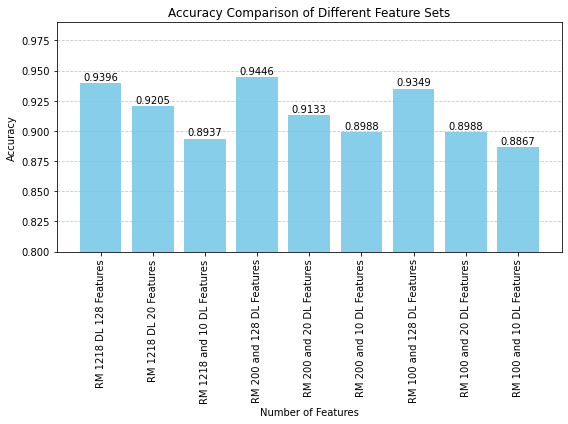

In [204]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
data = Final_accuracy

# Extract model names and corresponding accuracies for each scenario
# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(data.keys(), data.values(), color='skyblue')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Feature Sets')
plt.ylim(0.8, 0.99)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [205]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Input
import os
import datetime
import tensorflow as tf
import joblib
import SimpleITK as sitk
import numpy as np
from radiomics import featureextractor,imageoperations
import os
import pandas as pd
from pandas import DataFrame as DF
import warnings
import time
from time import sleep
from tqdm import tqdm
from skimage import measure

In [206]:
Final_accuracy_test={}

In [207]:
import datetime

# Get the current date
current_date = datetime.date.today()

# Format the date as a string in the desired format
current_date = current_date.strftime("%Y-%m-%d")
current_date

'2024-06-07'

In [208]:
Test_Data="./Radiomics_Feature_Test.csv"

In [215]:
test_df=pd.read_csv(Test_Data)
test_df.shape
#from sklearn.preprocessing import StandardScaler
#X_standardized = StandardScaler().fit_transform(Rm_200)
test_df.head()

Patient_id  nodule no  Malignancy  original_shape_Elongation  \
0  LIDC-IDRI-0188_5_roi.npy          5           0                   0.317123   
1  LIDC-IDRI-0815_1_roi.npy          1           0                   0.438790   
2  LIDC-IDRI-0722_3_roi.npy          3           0                   0.159157   
3  LIDC-IDRI-0360_1_roi.npy          1           0                   0.802400   
4  LIDC-IDRI-0442_2_roi.npy          2           0                   0.872474   

   original_shape_Flatness  original_shape_LeastAxisLength  \
0                 0.241002                       13.456962   
1                 0.320599                        7.877371   
2                 0.097434                        5.528393   
3                 0.609155                        3.902886   
4                 0.768964                        4.248386   

   original_shape_MajorAxisLength  original_shape_Maximum2DDiameterColumn  \
0                       55.837593                               20.248457   
1                       24.570779                               22.803509   
2                       56.739915                               13.453624   
3                        6.407046                                6.324555   
4                        5.524815                                6.324555   

   original_shape_Maximum2DDiameterRow  original_shape_Maximum2DDiameterSlice  \
0                            17.888544                              23.600847   
1                            14.317821                              21.189620   
2                            11.401754                              12.369317   
3                             7.280110                               8.062258   
4                             6.324555                               5.830952   

   original_shape_Maximum3DDiameter  original_shape_MeshVolume  \
0                         60.671245                2321.833333   
1                         23.958297                1019.250000   
2                         40.472213                 547.000000   
3                          8.124038                  82.041667   
4                          6.403124                  76.916667   

   original_shape_MinorAxisLength  original_shape_Sphericity  \
0                       17.707398                   0.670272   
1                       10.781410                   0.595255   
2                        9.030539                   0.586260   
3                        5.141015                   0.827249   
4                        4.820259                   0.902185   

   original_shape_SurfaceArea  original_shape_SurfaceVolumeRatio  \
0                 1265.087966                           0.544866   
1                  822.813745                           0.807274   
2                  551.720478                           1.008630   
3                  110.375035                           1.345353   
4                   96.947196                           1.260419   

   original_shape_VoxelVolume  original_firstorder_10Percentile  \
0                      2354.0                         -0.208594   
1                      1041.0                         -0.367188   
2                       567.0                         -0.453125   
3                        89.0                         -0.456250   
4                        82.0                         -0.570312   

   original_firstorder_90Percentile  original_firstorder_Energy  \
0                          0.375000                2.354836e+09   
1                          0.039062                1.040638e+09   
2                          0.304688                5.669052e+08   
3                          0.001563                8.895699e+07   
4                         -0.274219                8.192725e+07   

   original_firstorder_Entropy  original_firstorder_InterquartileRange  \
0                 7.835825e-01                                0.328125   
1                 6.330211e-01                                

In [210]:
import tensorflow as tf
import os
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Load the model
model = load_model('feature_extractor_model_27-05-2024_128.h5')

# Load or prepare your test data (replace this with your actual test data)
# X_test = ... 
# y_test = ...
train_data_path = r'./Test_Roi_file'
train_patients = [name for name in os.listdir(train_data_path) if os.path.isfile(os.path.join(train_data_path, name))]
file_list = sorted(train_patients)
data = [np.expand_dims(np.load(f'{train_data_path}/{file}'), axis=-1) for file in file_list]
X_test = np.array(data)
# Ensure X_test is a NumPy array
# X_test = np.array(X_test)

# Make predictions
predictions = model.predict(X_test)

predictions_df = pd.DataFrame(predictions)

# Save to CSV
predictions_df.to_csv('Deep_Learning_Test_1.csv', index=False)
# For a classification model, you might need to convert predictions to class labels

predictions_df=pd.read_csv('Deep_Learning_Test_1.csv')

9/9 [==============================] - 78s 8s/step


Radiomics Model with 1218 Features

In [213]:
import joblib

# Load the model
model = joblib.load('./best_SVM_model_1218_128_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)

# Get feature importances


# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)



Model parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Number of features: 1346
Class labels: [0 1]


In [216]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_SVM_model_1218_128_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_test = test_df.drop(columns=['Patient_id',	'nodule no',	'Malignancy'])
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_test,predictions_df], axis=1)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best_1 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_1)

c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1
 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0]


In [217]:

y_test_p=pd.DataFrame(y_pred_best_1)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_1218_128.csv"
y_test_p.to_csv(Pr_file)

In [218]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]




In [219]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_1)
report = classification_report(y_test, y_pred_best_1)
conf_matrix = confusion_matrix(y_test, y_pred_best_1)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 1218 DL 128 ']=accuracy

Accuracy: 0.7132616487455197
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80       219
           1       0.40      0.68      0.51        60

    accuracy                           0.71       279
   macro avg       0.65      0.70      0.65       279
weighted avg       0.79      0.71      0.74       279

Confusion Matrix:
 [[158  61]
 [ 19  41]]


200 Radiomics 128 DL Features

In [221]:
import joblib

# Load the model
model = joblib.load('./best_SVM_model_200_128_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)



# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)



Model parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Number of features: 328
Class labels: [0 1]


In [227]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_SVM_model_200_128_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_test = test_df[RM_200_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_test,predictions_df], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
y_pred_best_2 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_2)

[0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1
 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0
 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0]


c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [223]:
y_test_p=pd.DataFrame(y_pred_best_2)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_200_128.csv"
y_test_p.to_csv(Pr_file)

In [228]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [229]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_2)
report = classification_report(y_test, y_pred_best_2)
conf_matrix = confusion_matrix(y_test, y_pred_best_2)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 200 DL 128']=accuracy

Accuracy: 0.6845878136200717
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.78       219
           1       0.34      0.52      0.41        60

    accuracy                           0.68       279
   macro avg       0.60      0.62      0.60       279
weighted avg       0.74      0.68      0.70       279

Confusion Matrix:
 [[160  59]
 [ 29  31]]


100 Radiomics 128 Deep Learning Features

In [233]:
import joblib

# Load the model
model = joblib.load('./best_SVM_model_100_128_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)



# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)



Model parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Number of features: 228
Class labels: [0 1]


In [234]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_SVM_model_100_128_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_test = test_df[RM_100_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_test,predictions_df], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best_3 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_3)

[0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1
 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0
 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0]


c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [235]:
y_test_p=pd.DataFrame(y_pred_best_3)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_3.csv"
y_test_p.to_csv(Pr_file)

In [236]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [237]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_3)
report = classification_report(y_test, y_pred_best_3)
conf_matrix = confusion_matrix(y_test, y_pred_best_3)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 100 DL 128  Features']=accuracy

Accuracy: 0.6738351254480287
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.73      0.78       219
           1       0.32      0.47      0.38        60

    accuracy                           0.67       279
   macro avg       0.58      0.60      0.58       279
weighted avg       0.72      0.67      0.69       279

Confusion Matrix:
 [[160  59]
 [ 32  28]]


Radiomics 1218 Deep Learning 20

In [238]:
import joblib

# Load the model
model = joblib.load('./best_SVM_model_1218_20_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)



# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)

# Get number of classes


Model parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Number of features: 1238
Class labels: [0 1]


In [242]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_SVM_model_1218_20_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_test = test_df.drop(columns=['Patient_id','nodule no','Malignancy'])
DL_20=predictions_df[DL_20_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_test,DL_20], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best_4 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_4)

c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1
 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1
 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0]


In [243]:
y_test_p=pd.DataFrame(y_pred_best_4)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_4.csv"
y_test_p.to_csv(Pr_file)

In [244]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [245]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_4)
report = classification_report(y_test, y_pred_best_4)
conf_matrix = confusion_matrix(y_test, y_pred_best_4)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 1218 DL 20  ']=accuracy

Accuracy: 0.7060931899641577
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.79       219
           1       0.39      0.67      0.49        60

    accuracy                           0.71       279
   macro avg       0.64      0.69      0.64       279
weighted avg       0.78      0.71      0.73       279

Confusion Matrix:
 [[157  62]
 [ 20  40]]


RM 1218 DL 10

In [246]:
import joblib

# Load the model
model = joblib.load('./best_SVM_model_1218_10_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)

# Get feature importances


# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)

# Get number of classes


Model parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Number of features: 1228
Class labels: [0 1]


In [247]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_SVM_model_1218_10_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_test = test_df.drop(columns=['Patient_id','nodule no','Malignancy'])
DL_10=predictions_df[DL_10_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_test,DL_10], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
y_pred_best_5 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_5)

c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1
 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0]


In [248]:
y_test_p=pd.DataFrame(y_pred_best_5)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_5.csv"
y_test_p.to_csv(Pr_file)

In [249]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [250]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_5)
report = classification_report(y_test, y_pred_best_5)
conf_matrix = confusion_matrix(y_test, y_pred_best_5)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 1218 DL 10  ']=accuracy

Accuracy: 0.7025089605734767
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.69      0.79       219
           1       0.40      0.73      0.51        60

    accuracy                           0.70       279
   macro avg       0.65      0.71      0.65       279
weighted avg       0.80      0.70      0.73       279

Confusion Matrix:
 [[152  67]
 [ 16  44]]


In [252]:
import joblib

# Load the model
model = joblib.load('./best_SVM_model_200_20_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)

# Get feature importances


# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)



Model parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Number of features: 220
Class labels: [0 1]


In [253]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_SVM_model_200_20_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_200 = test_df[RM_200_top_feature_names]
DL_20=predictions_df[DL_20_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_200,DL_20], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
y_pred_best_6 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_6)

[0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1
 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1
 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0]


c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [254]:
y_test_p=pd.DataFrame(y_pred_best_6)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_6.csv"
y_test_p.to_csv(Pr_file)

In [255]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [256]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_6)
report = classification_report(y_test, y_pred_best_6)
conf_matrix = confusion_matrix(y_test, y_pred_best_6)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 200 DL 20  ']=accuracy

Accuracy: 0.6523297491039427
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.69      0.76       219
           1       0.31      0.52      0.39        60

    accuracy                           0.65       279
   macro avg       0.58      0.60      0.57       279
weighted avg       0.73      0.65      0.68       279

Confusion Matrix:
 [[151  68]
 [ 29  31]]


In [257]:
import joblib

# Load the model
model = joblib.load('./best_SVM_model_200_10_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)


# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)



Model parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Number of features: 210
Class labels: [0 1]


In [258]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_SVM_model_200_10_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_200 = test_df[RM_200_top_feature_names]
DL_10=predictions_df[DL_10_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_200,DL_10], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
y_pred_best_7 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_7)

[0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1
 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0]


c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [259]:
y_test_p=pd.DataFrame(y_pred_best_7)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_7.csv"
y_test_p.to_csv(Pr_file)

In [261]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [262]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_7)
report = classification_report(y_test, y_pred_best_7)
conf_matrix = confusion_matrix(y_test, y_pred_best_7)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 200 DL 10  ']=accuracy

Accuracy: 0.7060931899641577
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79       219
           1       0.40      0.70      0.51        60

    accuracy                           0.71       279
   macro avg       0.65      0.70      0.65       279
weighted avg       0.79      0.71      0.73       279

Confusion Matrix:
 [[155  64]
 [ 18  42]]


In [267]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_SVM_model_100_20_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_100 = test_df[RM_100_top_feature_names]
DL_20=predictions_df[DL_20_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_100,DL_20], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
y_pred_best_8 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_8)

[0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1
 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1
 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0]


c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [268]:
y_test_p=pd.DataFrame(y_pred_best_8)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_8.csv"
y_test_p.to_csv(Pr_file)

In [269]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [270]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_8)
report = classification_report(y_test, y_pred_best_8)
conf_matrix = confusion_matrix(y_test, y_pred_best_8)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 100 DL 20  ']=accuracy

Accuracy: 0.6594982078853047
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.70      0.76       219
           1       0.32      0.52      0.39        60

    accuracy                           0.66       279
   macro avg       0.58      0.61      0.58       279
weighted avg       0.73      0.66      0.68       279

Confusion Matrix:
 [[153  66]
 [ 29  31]]


In [271]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_SVM_model_100_10_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_100 = test_df[RM_100_top_feature_names]
DL_10=predictions_df[DL_10_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_100,DL_10], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
y_pred_best_9 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_9)

[0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1
 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1
 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0
 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0]


c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [272]:
y_test_p=pd.DataFrame(y_pred_best_9)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_9.csv"
y_test_p.to_csv(Pr_file)

In [273]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [274]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_9)
report = classification_report(y_test, y_pred_best_9)
conf_matrix = confusion_matrix(y_test, y_pred_best_9)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 100 DL 10  ']=accuracy

Accuracy: 0.6738351254480287
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.72      0.78       219
           1       0.33      0.52      0.41        60

    accuracy                           0.67       279
   macro avg       0.59      0.62      0.59       279
weighted avg       0.73      0.67      0.70       279

Confusion Matrix:
 [[157  62]
 [ 29  31]]


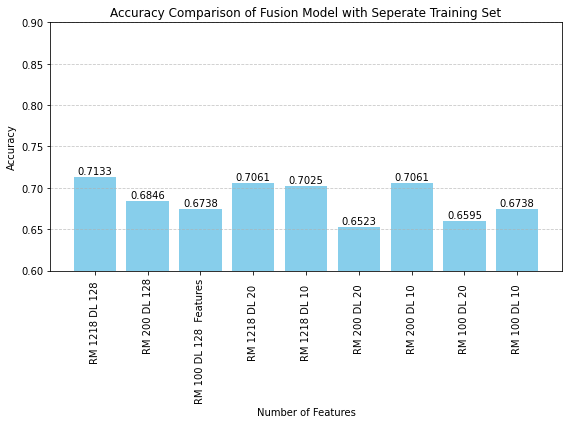

In [277]:
data = Final_accuracy_test

# Extract model names and corresponding accuracies for each scenario
# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(data.keys(), data.values(), color='skyblue')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Fusion Model with Seperate Training Set')
plt.ylim(0.6, .9)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()
plt.show()